# ***Projet on Text and Annotations***

Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary.  
   
Perhaps the most basic types of annotations you will use are axes label and title, but the option go beyond this. Let's take a look at some data and how we might visualize and annotate it to help convey interesting information:

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

Let's return to some data we worked with earlier in Birthrate Analysis, where we generated a plot of average births over the course of the calendar year;  
   
We'll start with the same cleaning procedure we used there, and plot the results

In [2]:
births = pd.read_csv('/content/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


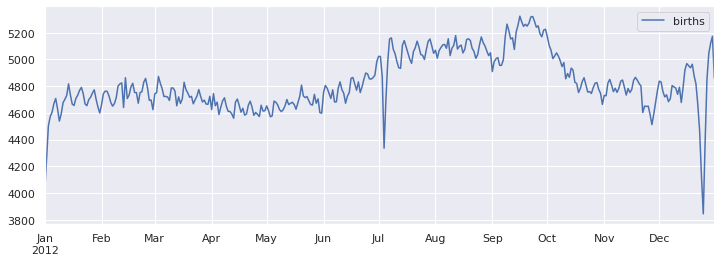

In [4]:
quartiles = np.percentile(births["births"], [25,50,75])
mean, sigma = quartiles[1], 0.74*(quartiles[2]-quartiles[0])
births = births.query('(births > @mean - 5* @sigma) & (births < @mean + 5* @sigma)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format="%Y%m%d")
birthsDate = births.pivot_table('births', [births.index.month, births.index.day])
birthsDate.index = [pd.datetime(2012,month, day) for (month, day) in birthsDate.index]
fig, ax = plt.subplots(figsize=(12,4))
birthsDate.plot(ax=ax)
plt.show()

When we're communication data like this, it is often useful to annotate certain features of the plot to draw the reader's attention. this can be done manually with the plt.text/ax.text command, which place text at a particular x/y value:

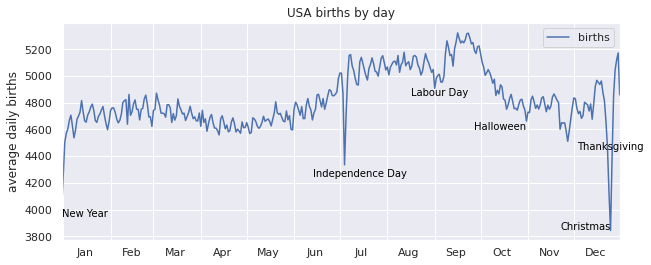

In [6]:
fig, ax = plt.subplots(figsize=(10,4))
birthsDate.plot(ax=ax)
style=dict(size=10, color='black')
ax.text("2012-1-1", 3950, "New Year", **style)
ax.text("2012-7-14", 4250, "Independence Day", ha="center", **style)
ax.text("2012-9-4", 4850, "Labour Day", ha="center", **style)
ax.text("2012-10-31", 4600, "Halloween", ha="right", **style)
ax.text("2012-12-25", 4450, "Thanksgiving", ha="center", **style)
ax.text("2012-12-25", 3850, "Christmas", ha="right", **style)

# Labeling the axes
ax.set(title="USA births by day", ylabel="average daily births")

# Format the x axis with centerd month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%h"))
plt.show()


The ax.text method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text. Here we used ha='right' and ha='center' , where ha is short for horizonal alignment.  


## ***Transforms and Text Position***  
It is helpful knowledge to have when considering the placement of text on figure. There are three predefined transforms that can be useful in this situation:  
**ax.transData**: Transform associated with data coordinates  
**ax.transAxes**: Transform associated with the axes (in units of axes dimensions)  
**fig.transFigure**:  Transform associated with the figure (in units of figure dimensions).  
   
Here let's look at an example of drawing text at various location using these transforms:

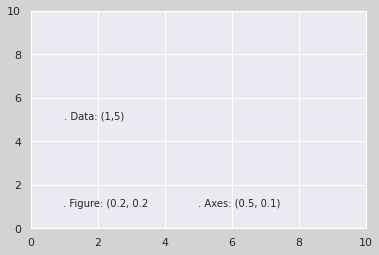

In [7]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# Transform=ax.transData is the default, but we'll specify it anyway
ax.text(1,5, ". Data: (1,5)", Transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", Transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2", Transform=fig.transFigure)
plt.show()

Here we'll use annotate with several of its options

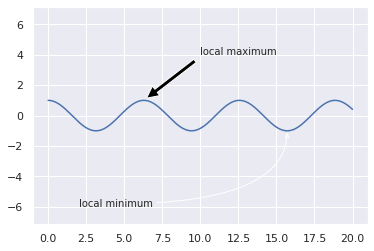

In [8]:
fig, ax=plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle3,angleA=0,angleB=-90"))
plt.show()

The arrow style is controlled through the arrowprops dictionary, which has numerous options available. Let's demonstrate several of the possible option using the birthrate plot from before:

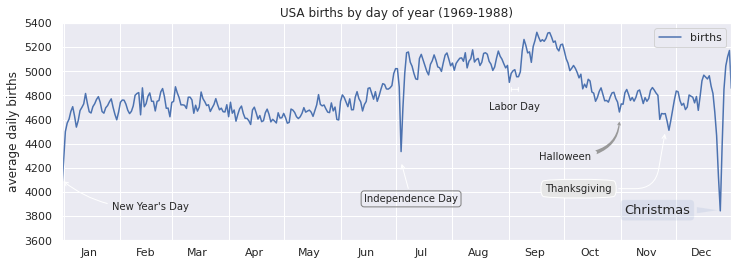

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
birthsDate.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
xytext=(50, -30), textcoords='offset points',
arrowprops=dict(arrowstyle="->",
connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
bbox=dict(boxstyle="round", fc="none", ec="gray"),xytext=(10, -40), textcoords='offset points', ha='center',
arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
xycoords='data', textcoords='data',
arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',
xytext=(-80, -40), textcoords='offset points',
arrowprops=dict(arrowstyle="fancy",
fc="0.6", ec="none",
connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',
xytext=(-120, -60), textcoords='offset points',
bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
arrowprops=dict(arrowstyle="->",
connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',
xytext=(-30, 0), textcoords='offset points',
size=13, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400)
plt.show()